In [11]:
# open the necessary packages to develop a convolutional neural network and the relevant MNIST dataset
# if packages not yet downloaded use: pip install
import tensorflow as tf
import numpy as np
import PIL.ImageOps
from keras.datasets import mnist
from PIL import Image, ImageFilter
from tensorflow.keras.utils import to_categorical
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from PIL import Image, ImageFilter, ImageDraw

In [12]:
# load the training and test dataset  
# reshape the datasets (single channel, scale the pixels, color, float numbers) 
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize the data to a range of 0-1 by dividing throug maximum value
# blablabla new comment
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
trainX = train_norm
testX = test_norm

In [10]:
# build a sequential model (stack of layers where each layer has exactly one input tensor and one output tensor)
# layer Conv2D: creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
# layer MaxPooling2D: downsamples the input for 2D spatial data
# layer Flatten: flattens input without affecting batch size
# layer Dense 1: regular densely-connected neural network layer, relu applies the rectified linear unit activation function
# layer Dense 2: regular densely-connected neural network layer, softmax converts a real vector to a vector of categorical probabilities, sum of vector element =1 
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
new_model.add(Dense(10, activation='softmax'))
new_model.summary()
    
# optimize(with learning rate and momentum) and compile the model 
opt = SGD(lr=0.01, momentum=0.9)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fit the model based on the training data set
# epochs = cutoff to separate training data in distinct phases (means we are going 10 times throug training dataset)
# batch_size = number of samples per gradient update
new_model.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1648 - accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0120 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0079 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0056 - accuracy: 0.9987
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [15]:
# evaluate the trained model based on the test accuray for the test dataset
test_loss, test_acc =new_model.evaluate(testX, testY, verbose=2)
print('\nTest accuracy:', test_acc)

# test accuracy of 98.8 percent evaluated as reasonably accurate - we proceed
# done with the model construction and training

313/313 - 1s - loss: 0.0412 - accuracy: 0.9875

Test accuracy: 0.987500011920929


<class 'PIL.Image.Image'>
(296, 322)
(20, 20)
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=L size=20x20 at 0x138EA6B20>
111
<class 'numpy.ndarray'>
[[253. 255. 196. 120. 119. 126. 143. 152. 160. 167. 179. 186. 187. 187.
  191. 198. 208. 233. 255. 255.]
 [255. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0. 115. 254.]
 [254. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 244.]
 [254. 255. 255. 238. 246. 233. 204. 193. 185. 167. 147. 137. 135. 158.
  143.   0.   1.   0.  72. 254.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  117.   0.   0.  13. 255. 253.]
 [255. 255. 253. 250. 250. 250. 248. 248. 248. 249. 249. 243. 255. 235.
    0.   0.   0. 255. 255. 253.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 254. 255. 255.  11.
    0.   0. 102. 255. 252. 255.]
 [255. 255. 255. 255. 255. 255. 255. 253. 255. 255. 255. 255. 209.   0.
    0.   1. 255. 255. 255. 255.]
 [2

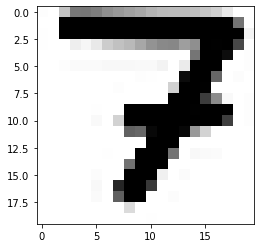

In [18]:
# build an image converter with the aim that the model predicts the digit of the new uploaded image 
# open the image, if saved in the same dictionary the name suffices, otherwise use whole savepath
im = Image.open('IMG7.png')

# get the bands in the image since python imaging library allows to store several band in a single image
im.getbands() 

# define type and depth of a pixel in the image
# use mode L: 8-bit pixels (has a range of 0-255), black and white
im = im.convert('L') 
im.getbands()
print(type(im)) 
print(im.size) 

# resizing and quality enhancement of the image
im = im.resize((20,20), Image.LANCZOS) 
im = im.filter(ImageFilter.SHARPEN) 
print(im.size) 
print(type(im)) 
print(im) 

# convert to a numpy array
test = np.array(im, dtype='float32')
print(type(test))
print(test)

# examination of the image format through visualization
# plot will appear at the end of the output
plt.imshow(test, cmap='gray') 

# insight: Color of the image has to be inverted because in the MNIST dataset they are written in with on a black canvas
# insight: Digit needs to be centered

# implementation of color inversion (now black = 0 and white = 255, mode L)
newImage = Image.new('L', (28, 28), (255)) 

# implementation of image centralization (vertical and horizontal distance from upper left corner)
newImage.paste(im,(4,4)) 

# invert the colors of the image (change black and white) 
# visualization: illustration of the shape to be recognized by the model (opened in a new window)
inverted_image = PIL.ImageOps.invert(newImage)
inverted_image.show()

In [19]:
# convert the image to a numpy array
# scale the image down to values between 0 - 1 by dividing through maximum (255)
inverted_image = np.array(inverted_image, dtype='float32')
print(type(inverted_image))
print(inverted_image)
inverted_image = inverted_image / 255.0 
print(inverted_image)
print(type(inverted_image))

# reshape the image in order to meet the form requirements for the neural network
inverted_image = inverted_image.reshape((1,28,28,1))
print(type(inverted_image))
print(inverted_image.shape)

<class 'numpy.ndarray'>
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   2.   0.  59. 135. 136. 129. 112. 103.  95.  88.
   76.  69.  68.  68.  64.  57.  47.  22.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 140.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 25

In [20]:
# predict the digit of our own image with the trained and tested model
# output with highest probability corresponds to the predicted digit by the model
predictions = new_model.predict(inverted_image)
print(predictions)
print("The hand written digit was classified as the digit :",np.argmax(predictions))

[[6.0283244e-11 2.9831498e-11 4.7577661e-04 3.5792090e-02 2.8261004e-13
  1.5884014e-16 5.9885853e-13 9.6373081e-01 1.1577955e-06 2.0970896e-07]]
The hand written digit was classified as the digit : 7


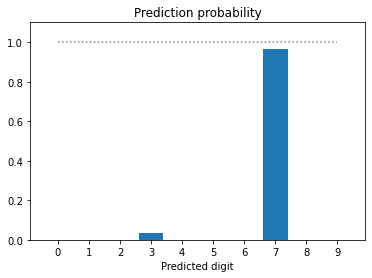

In [21]:
# visualization of the predicted probability for each digit
plt.bar(np.arange(len(predictions[0])),predictions[0])
plt.xticks(np.arange(len(predictions[0])))
plt.ylim(0, 1.1)
plt.hlines(1,0,9,color='gray',linestyles='dotted')
plt.title("Prediction probability")
plt.xlabel("Predicted digit")
plt.show()